# K-mean法を用いたクラスタリング

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(iris.target_names)
#print("shape")
#print(iris['data'].shape)
#print("特徴量の確認")
#print(iris['data'][:5])

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']


In [3]:
#目的に合うようにデータを加工する
X = iris.data[:, 2:4] #'petal length (cm)', 'petal width (cm)'のみを使用する
print("Xのサイズ")
print(X.shape)
print("X")
print(X[:5, :])

y = iris.target
print("yのサイズ")
print(y.shape)
print("y")
print(y[:5])

target_names = iris.target_names


Xのサイズ
(150, 2)
X
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
yのサイズ
(150,)
y
[0 0 0 0 0]


Text(0, 0.5, 'petal width (cm)')

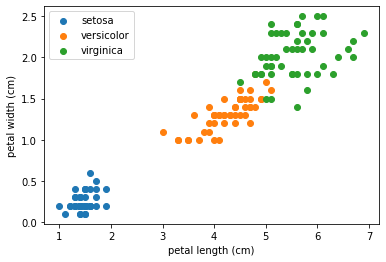

In [4]:
plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

## K-meanクラスタリングのアルゴリズム
K-meanでは下記のようなアルゴリズムに従いクラスタリングを行う。
1. クラスタの中心位置としてランダムな数を設定する。  
2. 各データに対して距離が最も近いクラスタ中心位置を選択する。距離の計算はL2ノルム(ユークリッド距離)を用いる。
$$
d = ||x - y||^ 2 _ 2
$$
3. 選択されたデータ群の平均位置を新たなクラスタの中心位置とする。
4. 2から再度行う。クラスタ中心位置が変化しなくなるか、所定回数以上行った場合処理を終了する。

In [5]:
from sklearn.cluster import KMeans

model = KMeans(random_state=0, n_clusters=3)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


Text(0, 0.5, 'petal width (cm)')

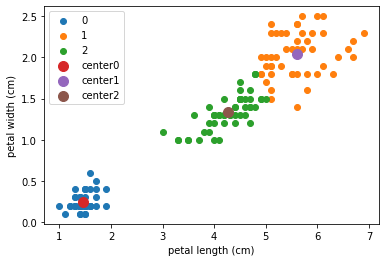

In [6]:
y_hat = model.labels_
centers = model.cluster_centers_
print(centers)
plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y_hat == i, 0], X[y_hat == i, 1], label=i)
for i, target_name in enumerate(target_names):
    plt.scatter(centers[i, 0], centers[i, 1], label='center'+str(i), s=100)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

----------
## K-meanクラスタリングの特徴

K-meanクラスタリングは最近傍のクラスタを選択する際にL2ノルムを使用するため、    
各クラスタが円形に分布していることを前提としている。  
よって、クラスタが円形に分布していない場合は正しくクラスタリングを行うことができない場合がある。

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.05, random_state=0)

No handles with labels found to put in legend.


Text(0, 0.5, 'petal width (cm)')

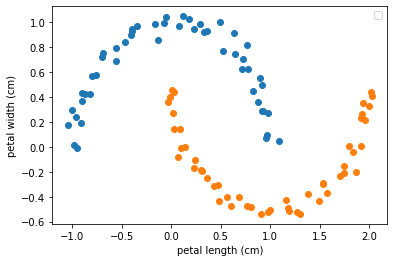

In [8]:
plt.figure()
for i in range(2):
    plt.scatter(X[y == i, 0], X[y == i, 1])
plt.legend(loc='best', shadow=False, scatterpoints=1)

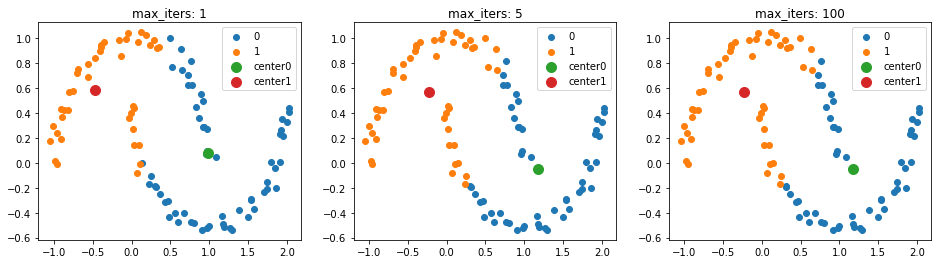

In [9]:
n_clusters = 2
max_iters = [1, 5, 100]

plt.subplots(figsize=(16, 4))
for i, max_iter in enumerate(max_iters):
    model = KMeans(random_state=0, n_clusters=n_clusters, n_init=1, max_iter=max_iter)
    model.fit(X)

    y_hat = model.labels_
    centers = model.cluster_centers_
    #print(y_hat)
    
    plt.subplot(1, len(max_iters), i+1)
    for j in range(n_clusters):
        plt.scatter(X[y_hat == j, 0], X[y_hat == j, 1], label=j)
    for j in range(n_clusters):
        plt.scatter(centers[j, 0], centers[j, 1], label='center'+str(j), s=100)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('max_iters: ' + str(max_iter))